# Classification

## Experiment 01

In [ ]:
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image 
from six import StringIO
import matplotlib.image as mpimg
#%pylab inline

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [181]:
url  = "https://raw.githubusercontent.com/waldeyr/Pedro_RED_SPL/main/RED_SPL.tsv"
df = pd.read_csv(url,  sep='\t' )

In [182]:
df.head()

,Serial,Region,Mutation_Position,Freq_Edition_0,Freq_Edition_1,Nucleotide_Substitution_1,Nucleotide_Substitution_2,P_Value,P_Value_Adjusted,Sym,...,MXE,RI,SE,LogFcExp,Delta_Free_Energy,Genetic_Var,Most_Severe_Cons,All_Cons,AA_Change,Codons_Change
1,1,chr1,111477647,0,0,CA,NaN,0.000459,0.000597,C1orf162,...,0,0,7,0.0,0.0,NaN,splice_region_variant,splice_region_variant splice_polypyrimidine_tr...,NaN,NaN
2,2,chr1,111477650,0,0,GA,GT,0.000149,0.000310,C1orf162,...,0,0,7,0.0,0.0,NaN,splice_acceptor_variant,splice_acceptor_variant intron_variant non_cod...,NaN,NaN
3,3,chr1,148532070,0,0,TC,NaN,0.000056,0.000172,NBPF14,...,0,0,0,0.0,-0.7,NaN,3_prime_UTR_variant,downstream_gene_variant 3_prime_UTR_variant,NaN,NaN
4,4,chr1,148532213,0,0,AG,TC,0.000171,0.000339,NBPF14,...,0,0,0,0.0,0.9,NaN,3_prime_UTR_variant,downstream_gene_variant 3_prime_UTR_variant,NaN,NaN
5,5,chr1,149555537,0,0,AG,NaN,0.000052,0.000169,NBPF19,...,0,0,0,0.0,0.0,NaN,3_prime_UTR_variant,3_prime_UTR_variant downstream_gene_variant,NaN,NaN


In [183]:
def setRegion(Region):
    if Region == 'chrX': return 23 # chromossome X
    if Region == 'chrY': return 24 # chromossome Y
    if Region == 'chrM': return 25 # Mitochondrial
    return re.sub('chr', '', Region)

df['Region'] = df['Region'].apply(lambda x: setRegion(x))
#df.Nucleotide_Substitution_1 = pd.factorize(df.Nucleotide_Substitution_1, na_sentinel=None)[0]
#df.Nucleotide_Substitution_2 = pd.factorize(df.Nucleotide_Substitution_2, na_sentinel=None)[0]

In [184]:
partial_dataset = df[["Mutation_Position", 
     "Freq_Edition_0", 
     "Freq_Edition_1", 
     "Nucleotide_Substitution_1", 
     "P_Value",
    "P_Value_Adjusted",
     "Delta_Free_Energy"]]

In [189]:
partial_dataset

,Mutation_Position,Freq_Edition_0,Freq_Edition_1,Nucleotide_Substitution_1,P_Value,P_Value_Adjusted,Delta_Free_Energy
1,111477647,0,0,CA,0.000459,0.000597,0.0
2,111477650,0,0,GA,0.000149,0.000310,0.0
3,148532070,0,0,TC,0.000056,0.000172,-0.7
4,148532213,0,0,AG,0.000171,0.000339,0.9
5,149555537,0,0,AG,0.000052,0.000169,0.0
...,...,...,...,...,...,...,...
398,77828020,0,0,TC,0.000007,0.000058,-0.6
399,77828148,0,0,TC,0.000224,0.000410,0.0
400,77828226,0,0,TC,0.000146,0.000307,0.2
401,77828331,0,0,TC,0.000005,0.000044,2.5


In [186]:
# temp.columns # test.apply(lambda x: copyRow(x), axis=1)

In [191]:
# Assumindo Nucleotide_Substitution_1 como etiqueta (variável dependente)
y = partial_dataset['Nucleotide_Substitution_1'].values

In [192]:
y

array(['CA', 'GA', 'TC', 'AG', 'AG', 'AG', 'AG', 'AG', 'TC', 'TC', 'TC',
       'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC',
       'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC',
       'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC',
       'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC',
       'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TA', 'TC', 'TC',
       'CA', 'CA', 'GT', 'AG', 'CT', 'TC', 'TG', 'CG', 'TC', 'CG', 'TA',
       'GT', 'GA', 'TC', 'TC', 'TC', 'TG', 'CT', 'CG', 'AG', 'AG', 'TC',
       'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'TC', 'AG', 'AG', 'GA', 'TC',
       'TC', 'AG', 'TC', 'AG', 'TA', 'GA', 'AG', 'GA', 'TC', 'TC', 'AG',
       'CG', 'TG', 'GT', 'TG', 'GC', 'AG', 'AG', 'CT', 'TG', 'AG', 'TG',
       'CT', 'TC', 'CT', 'GC', 'TG', 'CT', 'GC', 'GT', 'TC', 'AG', 'CA',
       'CA', 'TA', 'TA', 'AG', 'TG', 'TC', 'AT', 'AG', 'TC', 'CT', 'TC',
       'TC', 'AG', 'TC', 'AG', 'CG', 'TC', 'GT', 'C

In [193]:
# Removendo a coluna etiqueta
X = partial_dataset.drop(['Nucleotide_Substitution_1'], axis=1)

In [194]:
X

,Mutation_Position,Freq_Edition_0,Freq_Edition_1,P_Value,P_Value_Adjusted,Delta_Free_Energy
1,111477647,0,0,0.000459,0.000597,0.0
2,111477650,0,0,0.000149,0.000310,0.0
3,148532070,0,0,0.000056,0.000172,-0.7
4,148532213,0,0,0.000171,0.000339,0.9
5,149555537,0,0,0.000052,0.000169,0.0
...,...,...,...,...,...,...
398,77828020,0,0,0.000007,0.000058,-0.6
399,77828148,0,0,0.000224,0.000410,0.0
400,77828226,0,0,0.000146,0.000307,0.2
401,77828331,0,0,0.000005,0.000044,2.5


In [195]:
# Separação do dataset em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 1)

In [200]:
# Treinamento com árvore de decisão com profundidade mínima
arvore = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30, random_state=0)

In [201]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=30,
                       random_state=0)

Populating the interactive namespace from numpy and matplotlib


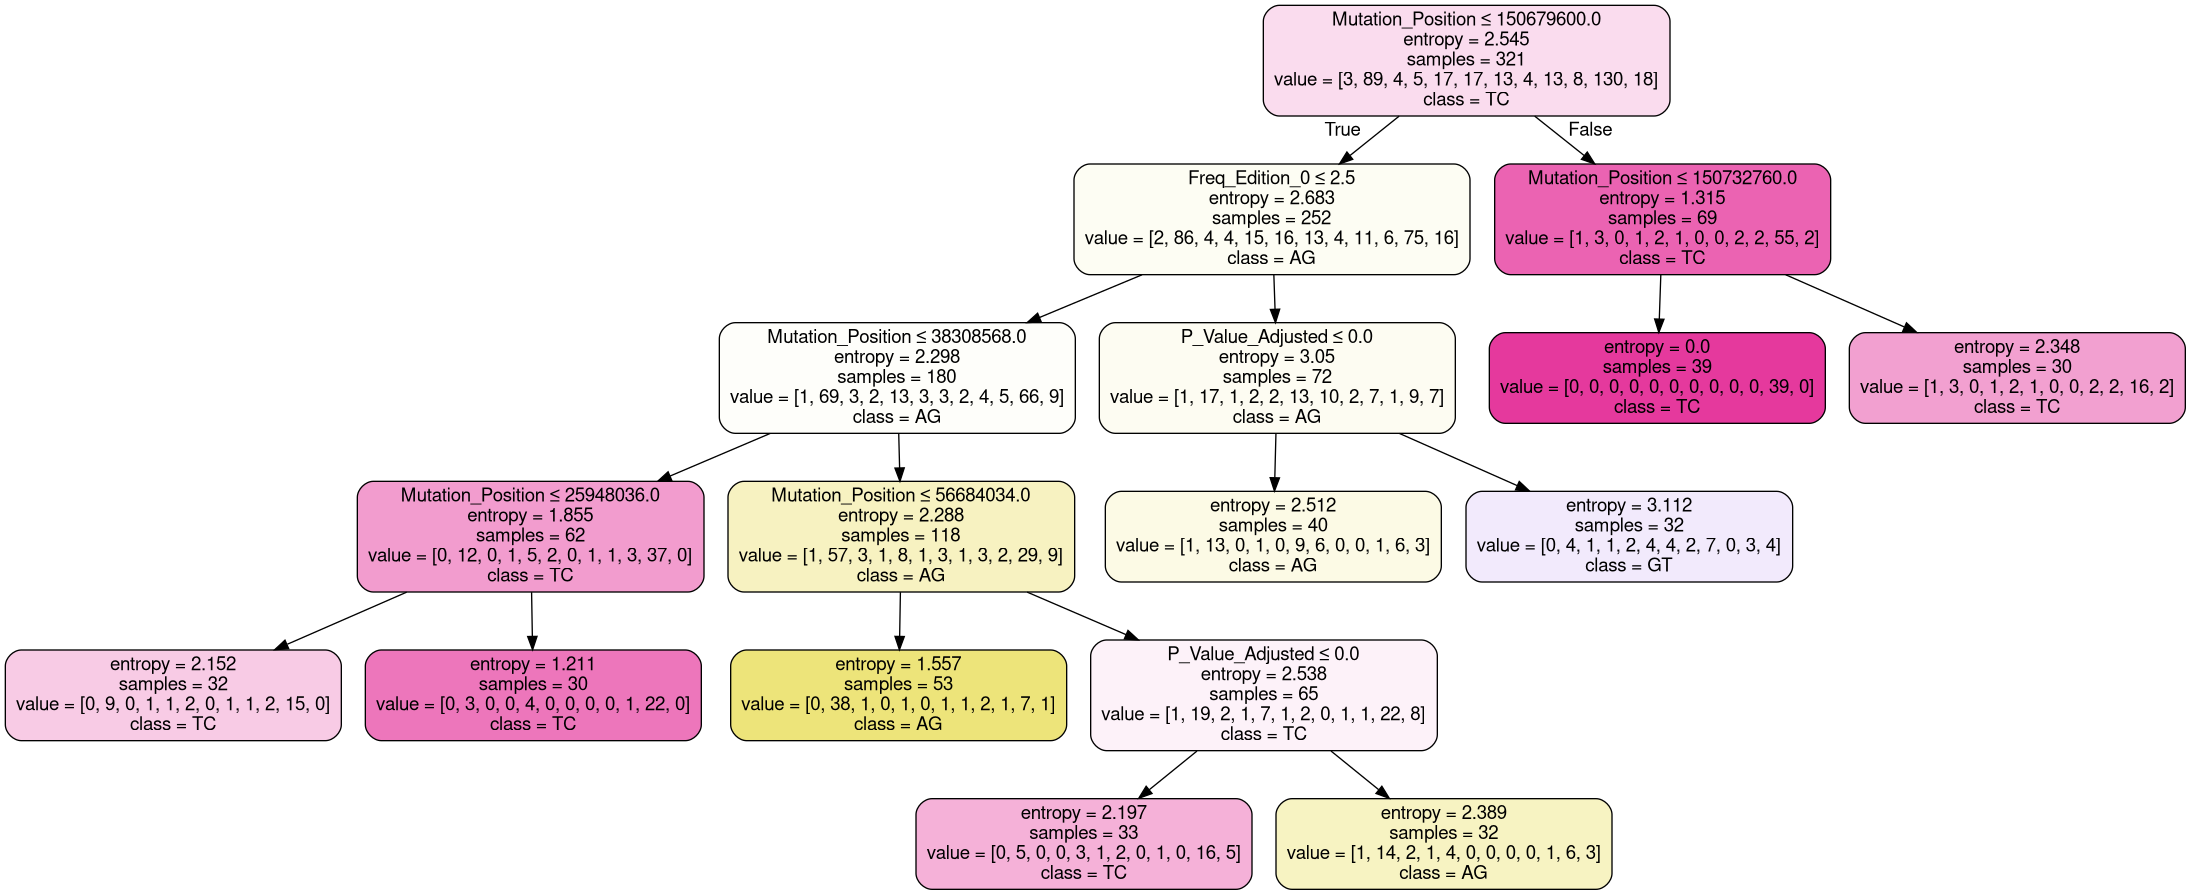

<Figure size 3600x3600 with 0 Axes>

In [211]:
nome_features = X.columns
nome_classes = arvore.classes_
%pylab inline
pylab.figure(figsize=(50,50))
dot_data = StringIO()
export_graphviz(arvore, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

Ranking de importância das características para o modelo:


0: Mutation_Position
1: Freq_Edition_0
2: Freq_Edition_1
3: P_Value
4: P_Value_Adjusted
5: Delta_Free_Energy


1. característica 0 (0.625425)
2. característica 1 (0.204914)
3. característica 4 (0.169661)
4. característica 5 (0.000000)
5. característica 3 (0.000000)
6. característica 2 (0.000000)


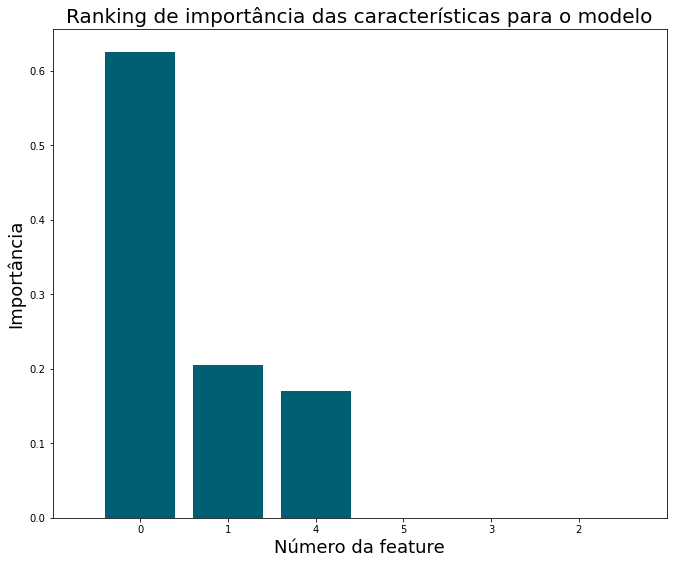

In [205]:
importances = arvore.feature_importances_
indices = np.argsort(importances)[::-1]
print("Ranking de importância das características para o modelo:")
print("\n")
cont=0
for name in nome_features:
    print(f"{cont}: {name}")
    cont = cont +1
print("\n")
for f in range(X.shape[1]):
    print("%d. característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Ranking de importância das características para o modelo", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],  color="#005f73",  align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importância", fontsize = 18)
plt.xlabel("Número da feature", fontsize = 18)
plt.show()

In [206]:
# Aplicando mo modelo gerado na base de testes
y_predicoes = arvore.predict(X_teste)

# Avaliação do modelo
print(f"Acurácia da árvore: {metrics.accuracy_score(y_teste, y_predicoes)}")
print(classification_report(y_teste, y_predicoes))

Acurácia da árvore: 0.43209876543209874
              precision    recall  f1-score   support

          AC       0.00      0.00      0.00         2
          AG       0.54      0.39      0.45        36
          CA       0.00      0.00      0.00         2
          CG       0.00      0.00      0.00         1
          CT       0.00      0.00      0.00         6
          GA       0.00      0.00      0.00         3
          GC       0.00      0.00      0.00         1
          GT       0.00      0.00      0.00         0
          TA       0.00      0.00      0.00         2
          TC       0.47      0.75      0.58        28

    accuracy                           0.43        81
   macro avg       0.10      0.11      0.10        81
weighted avg       0.40      0.43      0.40        81



/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/waldeyr/.conda/

## Experiment 02

random forests

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [213]:
modelo_random_forest = RandomForestClassifier()

In [214]:
modelo_random_forest.fit(X, y)

RandomForestClassifier()

In [217]:
# Avaliação do modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(modelo_random_forest, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Acurácia: %.2f; Desvio padrão: %.2f' % (mean(n_scores), std(n_scores)))

/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/waldeyr/.conda/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Acurácia: 0.50; Desvio padrão: 0.06
